# p.212 연습
감독자의 직무능력평가 데이터를 활용하여 차원축소 및 주성분 탐색을 위해 PCA 분석을 실시하고 결과를 해석하시오.
* 목표변수 : EVAL(연속형)

# Step 0. 패키지 불러오기

In [27]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# Scaler
from sklearn.preprocessing import StandardScaler
# PCA
from sklearn.decomposition import PCA
# Regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

# Step 1. 데이터 구성하기

### 데이터 불러오기

In [2]:
df_raw = pd.read_csv('D:/Study/PoscoAcademy/2_bigdata/raw_data/직무능력평가.csv')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


### 데이터 분리

In [3]:
df_raw_x = df_raw.drop('EVAL', axis = 1)
df_raw_y = df_raw['EVAL']

# Step 2. 선형관계 확인 : 산점도, 상관계수

### 산점도 행렬

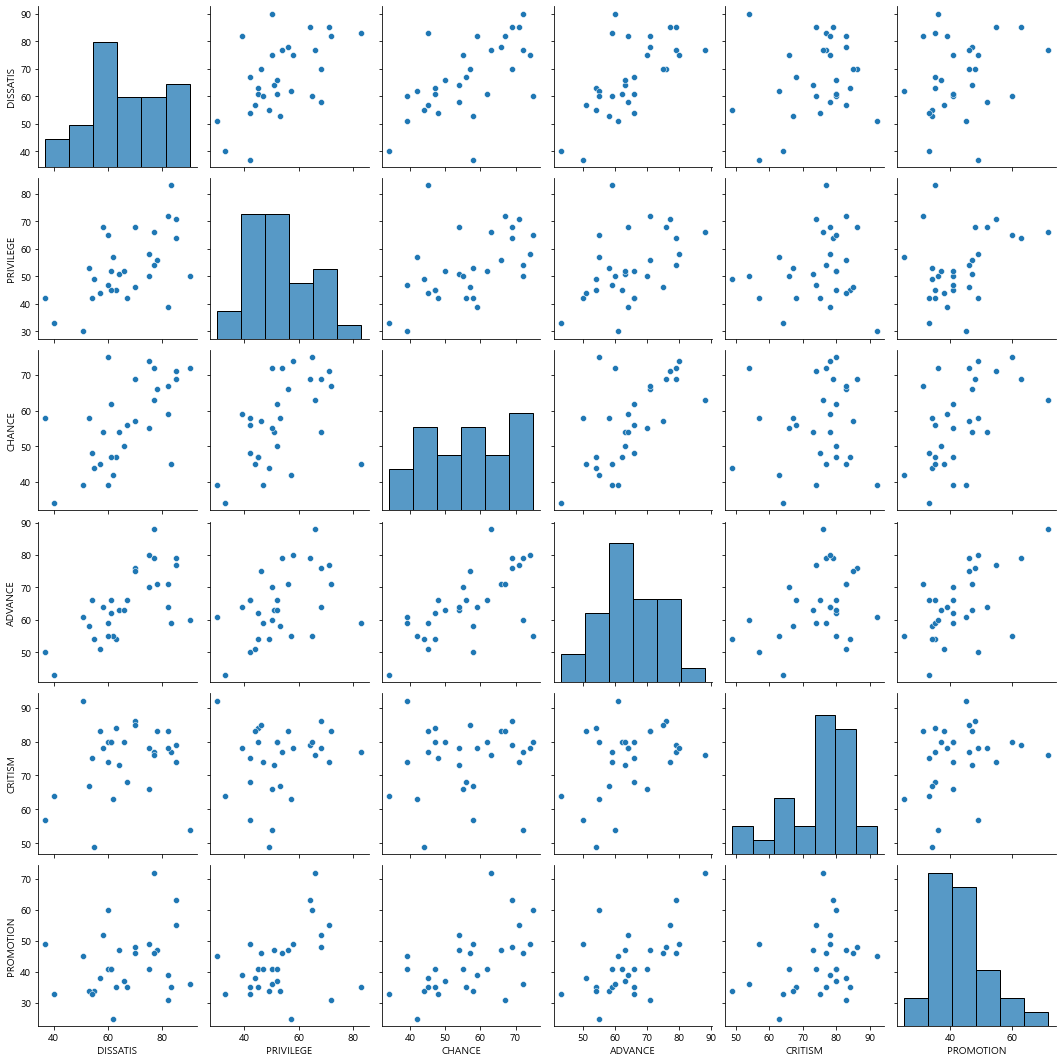

In [4]:
sns.pairplot(df_raw_x)

### 상관계수

In [6]:
df_raw_x.corr().round(4)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.0000,0.5583,0.5967,0.6692,0.1877,0.2246
PRIVILEGE,0.5583,1.0000,0.4933,0.4455,0.1472,0.3433
CHANCE,0.5967,0.4933,1.0000,0.6403,0.1160,0.5316
ADVANCE,0.6692,0.4455,0.6403,1.0000,0.3769,0.5742
CRITISM,0.1877,0.1472,0.1160,0.3769,1.0000,0.2833
PROMOTION,0.2246,0.3433,0.5316,0.5742,0.2833,1.0000


# Step 3. 데이터 확인 및 Scaler

### 요약 통계량 확인

In [7]:
df_raw_x.describe().round(4)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000
mean,66.6000,53.1333,56.3667,64.6333,74.7667,42.9333
std,13.3148,12.2354,11.7370,10.3972,9.8949,10.2887
min,37.0000,30.0000,34.0000,43.0000,49.0000,25.0000
25%,58.5000,45.0000,47.0000,58.2500,69.2500,35.0000
50%,65.0000,51.5000,56.5000,63.5000,77.5000,41.0000
75%,77.0000,62.5000,66.7500,71.0000,80.0000,47.7500
max,90.0000,83.0000,75.0000,88.0000,92.0000,72.0000


### Scaler

In [10]:
# 변수명 저장
x_cols = df_raw_x.columns
# Scaler
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# Scaler 확인
print('Scaled Data : \n {} \n'.format(nd_scaled[:5].round(4)))
print('Shape : \n {}'.format(nd_scaled.shape))

Scaled Data : 
 [[-1.1917 -1.923  -1.5049 -0.3554  1.7714  0.2043]
 [-0.1986 -0.1773 -0.2051 -0.1598 -0.1816  0.402 ]
 [ 0.2597  1.2358  1.0948  1.1119  1.1547  0.5009]
 [-0.275  -0.6761 -0.8117 -1.0402  0.9491 -0.7843]
 [ 0.8708  0.2383  0.8348  0.6228  0.8463  0.402 ]] 

Shape : 
 (30, 6)


In [11]:
# DataFrame 저장
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(4)
# Scaler 변환 데이터 요약 통계량
df_scaled.describe().round(4)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.0000,30.0000,30.0000,30.0000,30.0000,30.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0171,1.0171,1.0171,1.0171,1.0171,1.0171
min,-2.2611,-1.9230,-1.9382,-2.1163,-2.6485,-1.7728
25%,-0.6187,-0.6761,-0.8117,-0.6244,-0.5671,-0.7843
50%,-0.1222,-0.1358,0.0116,-0.1109,0.2810,-0.1911
75%,0.7944,0.7786,0.8998,0.6228,0.5379,0.4762
max,1.7875,2.4827,1.6147,2.2858,1.7714,2.8734


# Step 4. PCA

### PCA

In [13]:
# 주성분 1 ~ 주성분 6 생성 및 저장
pca = PCA(n_components = 6)
nd_pca = pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print('PCA Data : \n {}\n'.format(nd_pca[:5]))
# 생성된 주성분 점수 Row, Column 개수 확인
print('Shape : \n {}'.format(nd_pca.shape))

PCA Data : 
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]

Shape : 
 (30, 6)


### PCA 결과 : 주성분 점수

In [14]:
# 주성분 1 ~ 주성분 6 점수 저장 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


### PCA 결과 : 고유값 확인 및 주성분 개수 결정

In [16]:
# 주성분 분석 통계량
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,7)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(4)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.2785,0.5282,0.5282
1,2,1.0410,0.1677,0.6959
2,3,0.7892,0.1272,0.8231
3,4,0.5716,0.0921,0.9152
4,5,0.3282,0.0529,0.9680
5,6,0.1984,0.0320,1.0000


* 상관계수 기준(고유값 > 1) : 2개
* 공분산 기준(고유값 누적비율 > 0.8) : 3개

### PCA 결과 : Scree Plot 확인 및 주성분 개수 결정

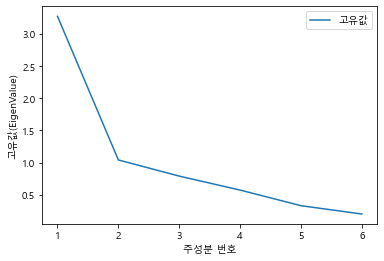

In [18]:
# Scree Plot
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = '고유값')
plt.ylabel('고유값(EigenValue)')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')
plt.show()

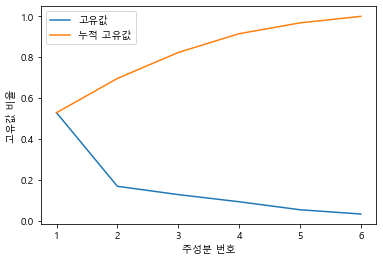

In [22]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],
         df_pca_stat['EigenValueRatio'],
         label = '고유값')
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],
         df_pca_stat['CumEigenValueRatio'],
         label = '누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')
plt.show()

### PCA 결과 : 고유 벡터 확인

In [23]:
# 변수 이름
x_cols = pd.DataFrame({'Feature' : df_raw_x.columns})
# 주성분 1 ~ 주성분 6 고유벡터 저장
df_eigenvetor = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1,
                                                columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])], axis = 1)
df_eigenvetor.round(4)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.4394,-0.3126,0.4452,0.3160,-0.1915,-0.6119
1,PRIVILEGE,0.3947,-0.3088,0.2174,-0.8148,-0.0377,0.1903
2,CHANCE,0.4614,-0.2171,-0.2720,0.2248,0.7756,0.1177
3,ADVANCE,0.4927,0.1155,0.0056,0.3651,-0.4604,0.6314
4,CRITISM,0.2248,0.8022,0.4572,-0.0999,0.2889,-0.0578
5,PROMOTION,0.3808,0.3207,-0.6866,-0.2057,-0.2547,-0.4165


# Step 5. 주성분 상관관계

### 산점도 행렬

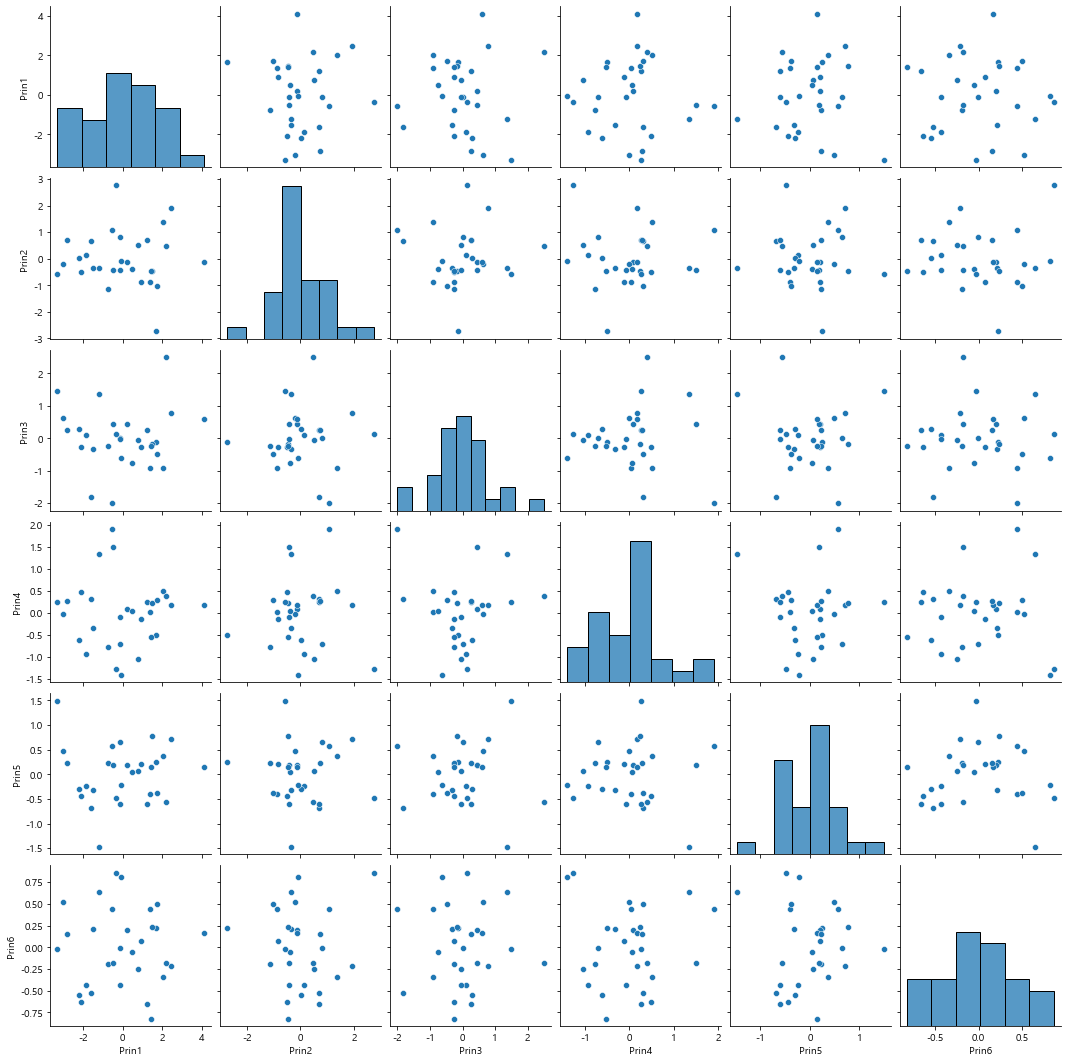

In [24]:
sns.pairplot(df_pca)

### 상관계수

In [25]:
df_pca.corr().round(4)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,0.0,0.0,-0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,0.0
Prin4,-0.0,0.0,0.0,1.0,0.0,0.0
Prin5,0.0,0.0,0.0,0.0,1.0,0.0
Prin6,0.0,-0.0,0.0,0.0,0.0,1.0


### 회귀분석 : raw

In [29]:
# 절편 추가
df_raw_x_const = sm.add_constant(df_raw_x)
# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.24e-05
Time:                        09:51:24   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

### 회귀분석 : PCA

In [33]:
# 주성분 선택
x_vars = ['Prin1','Prin2','Prin3']
# 절편 추가
df_pca_const = sm.add_constant(df_pca[x_vars])
# 회귀모델 생성
reg_pca_model = sm.OLS(df_raw_y, df_pca_const)
# 회귀모델 적합
reg_pca_model = reg_pca_model.fit()
# 모델 성능 확인
print(reg_pca_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.02e-05
Time:                        09:56:23   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

* raw 를 이용한 모델보타 주성분 3개를 이용한 회귀무델의 설명력이 11% 정도 낮음
* 회귀계수는 모두 유의함